In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(
    lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list
)

c:\Users\DELL\anaconda3\envs\data_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import seaborn as sns

<h3>Bar Charts</h3>


In [7]:
df_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_us = df_us.dropna(subset=['salary_year_avg'])

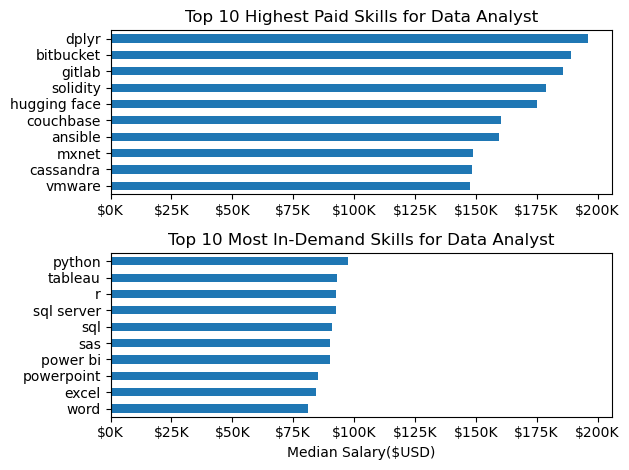

In [14]:
df_us = df_us.explode('job_skills')

df_us_group = df_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_us_top_pay = df_us_group.sort_values(by='median', ascending=False).head(10)
df_us_skills_count = df_us_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)


fig, ax = plt.subplots(2, 1)

# --> Top 10 Highest Paid Skills for Data Analyst
df_us_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# --> Top 10 Most In-Demand Skills for Data Analyst
df_us_skills_count.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()

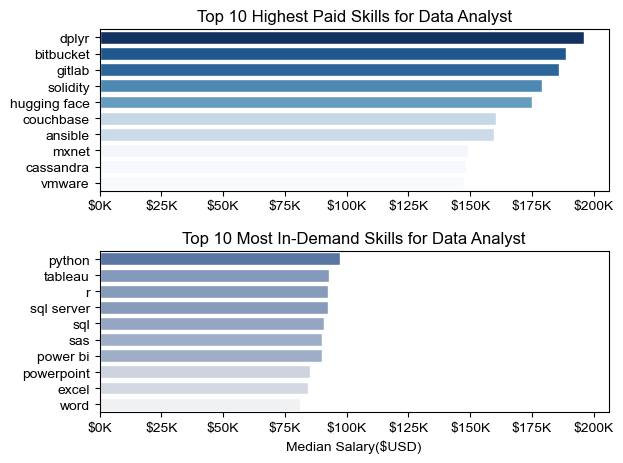

In [30]:
df_us = df_us.explode('job_skills')

df_us_group = df_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_us_top_pay = df_us_group.sort_values(by='median', ascending=False).head(10)
df_us_skills_count = df_us_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2, 1)
sns.set_theme(style='ticks')
# --> Top 10 Highest Paid Skills for Data Analyst
sns.barplot(data=df_us_top_pay, x='median', y=df_us_top_pay.index, ax=ax[0], hue='median', palette='Blues')
ax[0].legend().remove()

#df_us_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# --> Top 10 Most In-Demand Skills for Data Analyst
sns.barplot(data=df_us_skills_count, x='median', y=df_us_skills_count.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()

#df_us_skills_count.plot(kind='barh', y='median', ax=ax[1], legend=False)
#ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()

<h3>Histograms</h3>

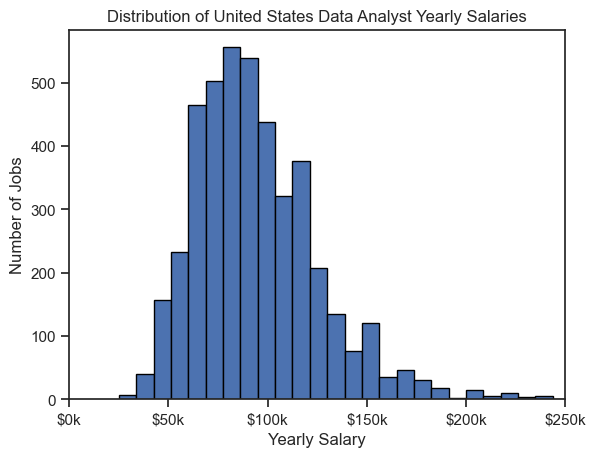

In [31]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_da_us['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250000)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

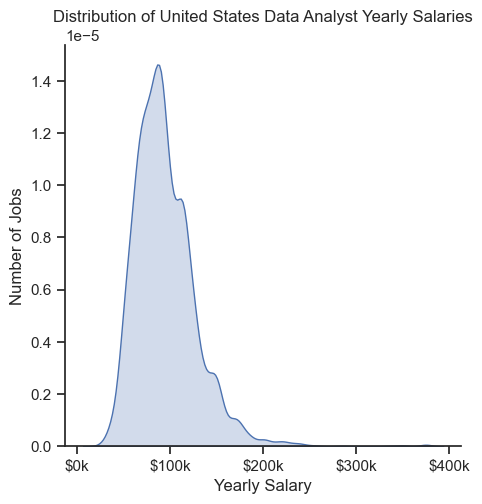

In [36]:
sns.displot(df_da_us['salary_year_avg'], kind='kde', fill=True )
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

<h3>Box Plots</h3>

C:\Users\DELL\AppData\Local\Temp\ipykernel_20720\1918938237.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


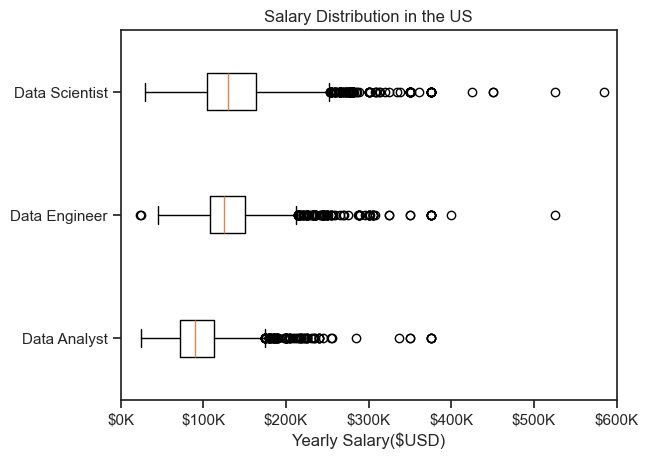

In [37]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_us = df_us.dropna(subset=['salary_year_avg'])

job_list = [df_us[df_us['job_title_short'] == job_title] ['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x / 1000)}K'))
plt.title('Salary Distribution in the US')
plt.xlabel('Yearly Salary($USD)')
plt.xlim(0, 600000)
plt.show()

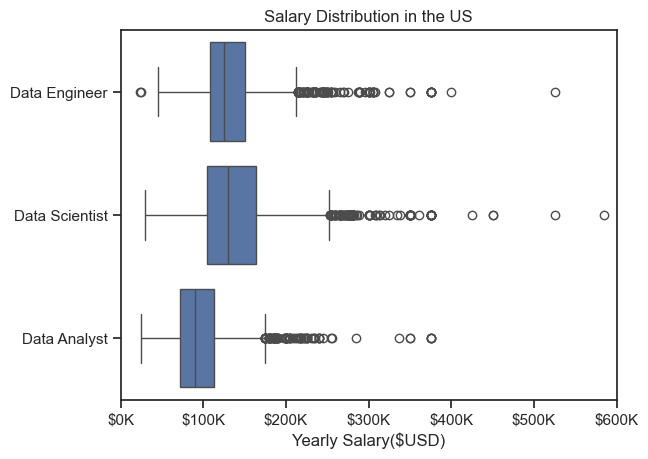

In [39]:
sns.boxplot(data=df_us, x='salary_year_avg', y='job_title_short')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x / 1000)}K'))
plt.title('Salary Distribution in the US')
plt.xlabel('Yearly Salary($USD)')
plt.ylabel('')
plt.xlim(0, 600000)
plt.show()